In [2]:
import numpy as np
import matplotlib.pyplot as plt
# — 準備輸入與正解——
input_data = np.arange(0, np.pi*2, 0.1) # 輸入
correct_data = np.sin(input_data) # 正確答案
input_data = (input_data-np.pi)/np.pi # 輸入為 -1.0 ~ 1.0 的範圍內
n_data = len(correct_data) # 資料的數量

In [3]:
# — 各設定值—
n_in = 1 # 輸入層的神經元數量 
n_mid = 3 # 中間層的神經元數量 
n_out = 1 # 輸出層的神經元數量
wb_width = 0.01 # 權重與偏值的範圍
eta = 0.1 # 學習率
epoch = 2001
interval = 200 # 顯示進度的間隔

In [8]:
# -- 中間層 -- 
class MiddleLayer:
    def __init__(self, n_upper, n): # 初期設定
        self.w1 = wb_width * np.random.randn(n_upper, n) # 權重(矩陣) 
        self.b1 = wb_width * np.random.randn(n) # 偏值(向量)
        
    def forward(self, x): # 前向傳播 
        self.x = x
        u1 = np.dot(x, self.w1) + self.b1
        self.y1 = 1/(1+np.exp(-u1)) # sigmoid 函數
        
    def backward(self, grad_y1):  # 反向傳播
        delta1 = grad_y1 * (1-self.y1)*self.y1  # sigmoid 函數的微分
        
        self.grad_w1= np.dot(self.x.T, delta1)
        self.grad_b1 = np.sum(delta1, axis=0)
                
    def update(self, eta):  # 更新權重與偏值
        self.w1 -= eta * self.grad_w1
        self.b1 -= eta * self.grad_b1

In [9]:
# -- 輸出層 --
class OutputLayer:
    def __init__(self, n_upper, n):  # 初期設定
        self.w2 = wb_width * np.random.randn(n_upper, n)  #權重（矩陣）
        self.b2 = wb_width * np.random.randn(n)  # 偏值（向量）
    
    def forward(self, y1):  # 前向傳播
        self.y1 = y1
        u2 = np.dot(y1, self.w2) + self.b2
        self.y2 = u2  # 恆等函數
    
    def backward(self, t):  # 反向傳播
        delta2 = self.y2 - t
                
        self.grad_w2 = np.dot(self.y1.T, delta2)
        self.grad_b2 = np.sum(delta2, axis=0)
        
        self.grad_y1 = np.dot(delta2, self.w2.T) 

    def update(self, eta):  # 更新權重與偏值
        self.w2 -= eta * self.grad_w2
        self.b2 -= eta * self.grad_b2

In [10]:
# -- 各層的初始化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

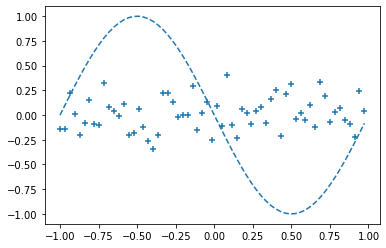

Epoch:0/2001 Error:0.2841605740046937


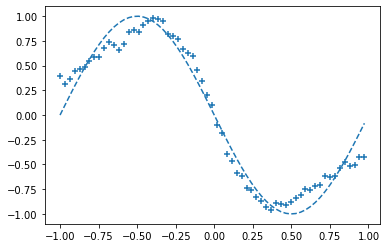

Epoch:200/2001 Error:0.009774243362608607


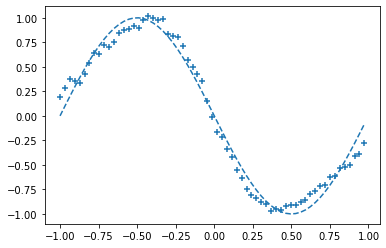

Epoch:400/2001 Error:0.004830300596944063


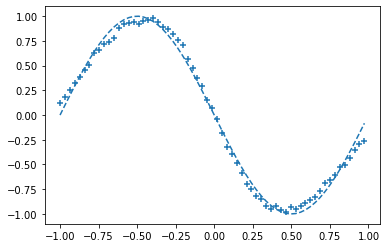

Epoch:600/2001 Error:0.001960773880180802


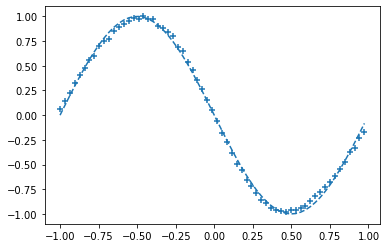

Epoch:800/2001 Error:0.0006046059867262524


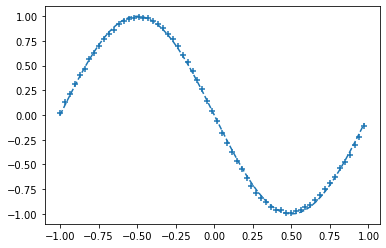

Epoch:1000/2001 Error:0.0001874955510812309


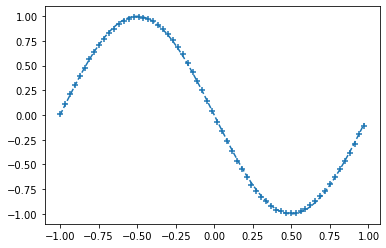

Epoch:1200/2001 Error:6.3882052481124e-05


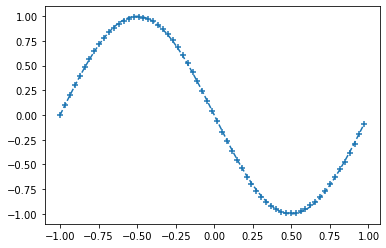

Epoch:1400/2001 Error:2.5747190589868932e-05


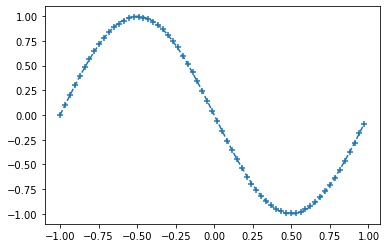

Epoch:1600/2001 Error:1.3134946626339627e-05


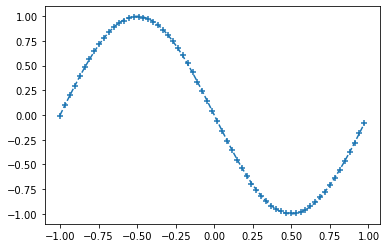

Epoch:1800/2001 Error:8.421370958051094e-06


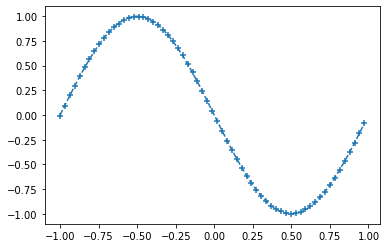

Epoch:2000/2001 Error:7.748690481016321e-06


In [11]:
# -- 各層的初始化 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)



# -- 學習 --
for i in range(epoch):

    # 索引洗牌
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 顯示結果用
    total_error = 0
    plot_x = []
    plot_y2 = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  # 輸入
        t = correct_data[idx:idx+1]  # 正確答案
        
        # 前向傳播
        middle_layer.forward(x.reshape(1, 1))  # 把輸入轉換成陣列
        output_layer.forward(middle_layer.y1)  

        # 反向傳播
        output_layer.backward(t.reshape(1, 1))  # 反向傳播
        middle_layer.backward(output_layer.grad_y1)
        
        # 更新權重與偏值
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y2 = output_layer.y2.reshape(-1)  # 將矩陣恢復成向量

            # 誤差計算
            total_error += 1.0/2.0*np.sum(np.square(y2 - t))  # 計算均方誤差
            
            # 輸出的記錄
            plot_x.append(x)
            plot_y2.append(y2)
            
    if i%interval == 0:
        
        # 顯示輸出的圖表
        

        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y2, marker="+")
        plt.show()
        
        # 顯示epoch 次數與誤差
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))
